In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\LENOVO\Desktop\\Sagata\\GzHmM9Jpdpfq0fdG\\ACME-HappinessSurvey2020.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14088\3744161201.py:1: SyntaxWarning: invalid escape sequence '\D'
  data=pd.read_csv("C:\\Users\\LENOVO\Desktop\\Sagata\\GzHmM9Jpdpfq0fdG\\ACME-HappinessSurvey2020.csv")


In [4]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
data['Y'].value_counts()

Y
1    69
0    57
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [10]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Slightly more than half customers are happy customers. 
Looking at the median values (at 50%) X2 and X3 seems to have lower responses relative to the other predictors. 
There does not seem to be a problem with orders being delivered on time but there seems to be a problem with the contents of the order matching customer expectations. 
Looking at the median value for x4, it doesn't seem like people are unhappy with the price.
In summary, most people are having a problem with ordering everything they want and contents of the order misaligned with expectations. 

Class-wise Statistical Analysis

In [14]:
happy = data[data['Y']==1]
happy.describe()

,Y,X1,X2,X3,X4,X5,X6
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.0,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.0,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,1.0,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
unhappy = data[data['Y']==0]
unhappy.describe()

,Y,X1,X2,X3,X4,X5,X6
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,0.0,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,0.0,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,0.0,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The class wise breakdown further suggests that there is a problem with the contents of the order matching customer expectations (X2) and customers are unable to order everything they want. 
The class wise breakdown also suggests that there is no problem with x1,x4,x5,x6 as these factors have recieved high responses. 

Box Plots

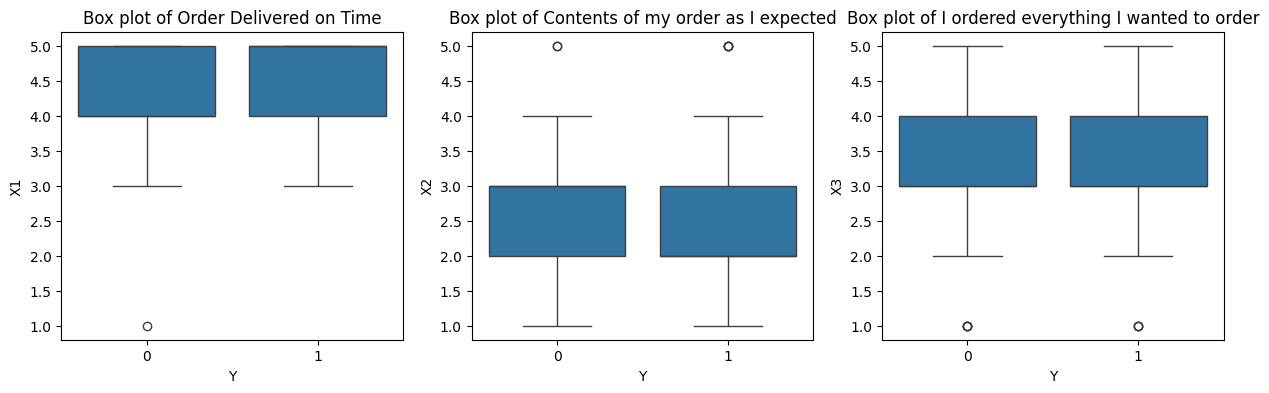

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='Y',y='X1',data=data)
plt.title('Box plot of Order Delivered on Time')
plt.subplot(1,3,2)
sns.boxplot(x='Y',y='X2',data=data)
plt.title('Box plot of Contents of my order as I expected')
plt.subplot(1,3,3)
sns.boxplot(x='Y',y='X3',data=data)
plt.title('Box plot of I ordered everything I wanted to order')
plt.show()

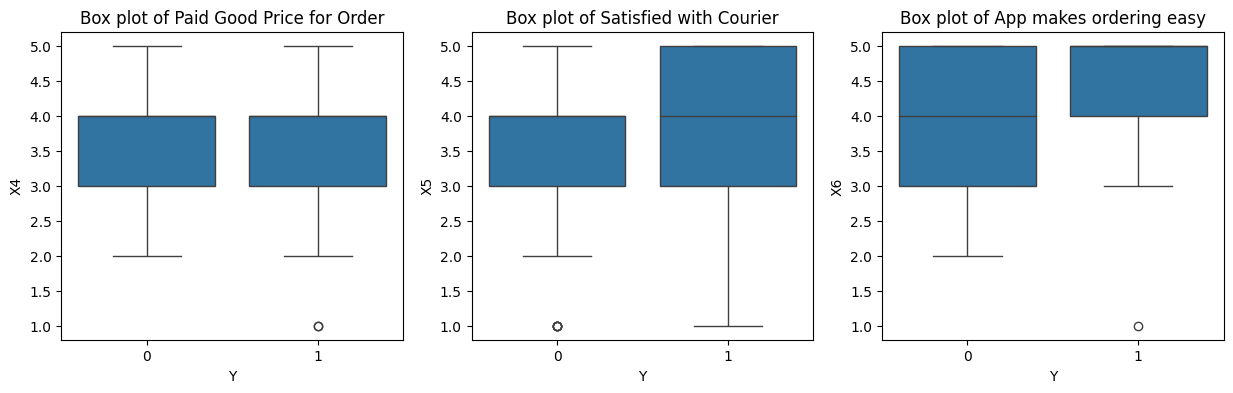

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='Y',y='X4',data=data)
plt.title('Box plot of Paid Good Price for Order')
plt.subplot(1,3,2)
sns.boxplot(x='Y',y='X5',data=data)
plt.title('Box plot of Satisfied with Courier')
plt.subplot(1,3,3)
sns.boxplot(x='Y',y='X6',data=data)
plt.title('Box plot of App makes ordering easy')
plt.show()

The box plots offer additional insight. It suggests that x5 and x6 maybe good predictors of the outcome. It would just depend if the seperation in the median values or mean values is statistically significant. One could do a t-test to confirm this. However a t-test relies on some assumptions since we don't have information on the experimental design of this data collection doing a t-test may lead to incorrect conclusions. 

Bi-variate Data Analysis

Pair Plot

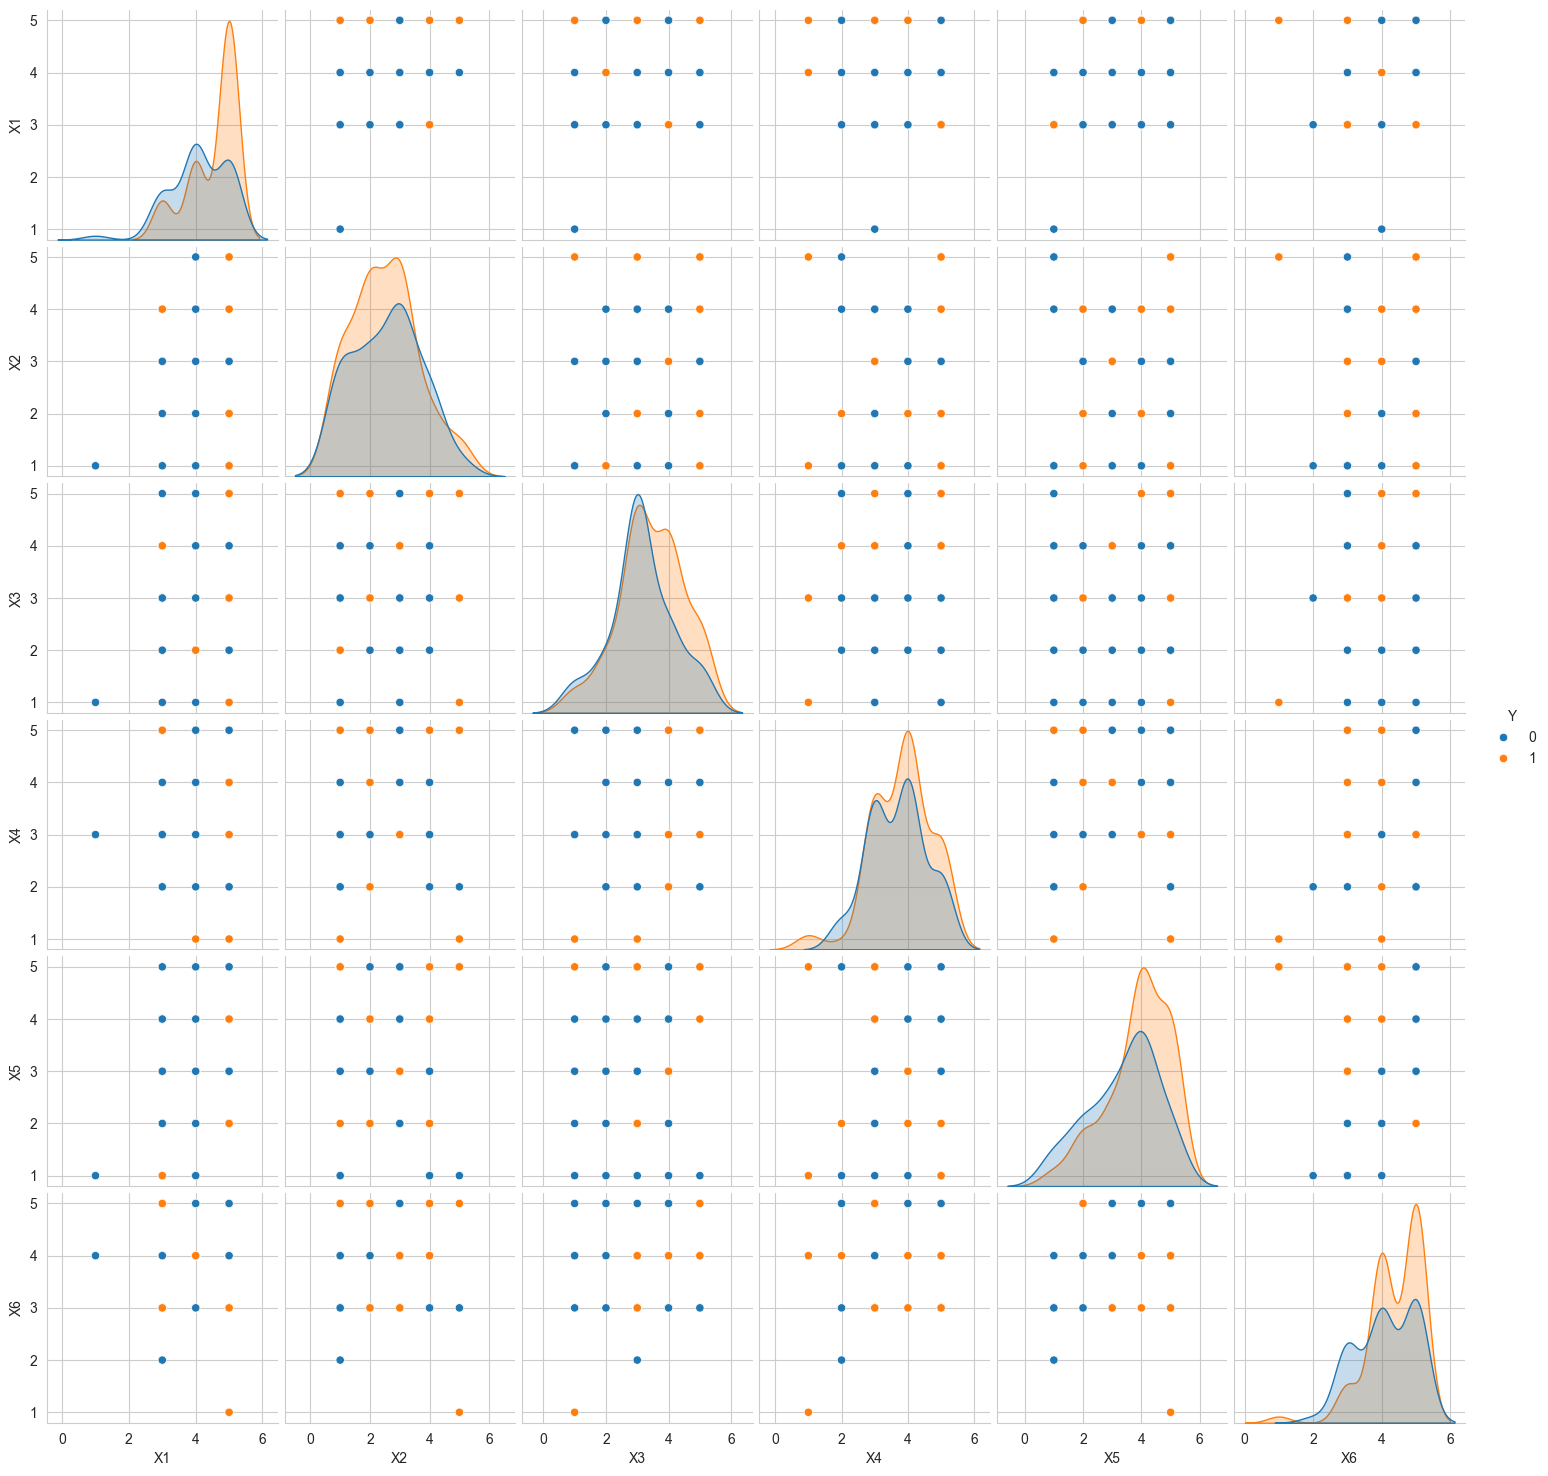

In [20]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='Y')
plt.show()

The scatter plots suggest that is no coherent relationship between any two predictor variables, and no single variable shows any predictive insight either. 

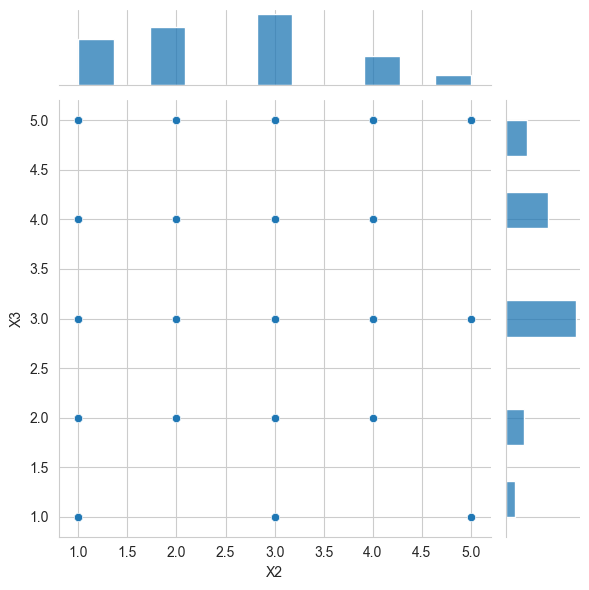

In [21]:
sns.jointplot(x='X2', y='X3', data=data, kind='scatter')
plt.show()

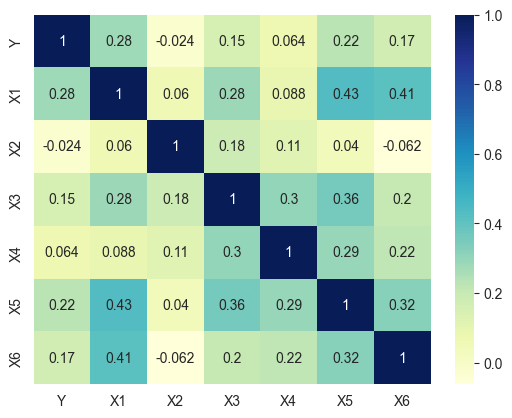

In [22]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

Heat map confirms there is no coherent relationship or correlation between variables.

3D Scatter Plot


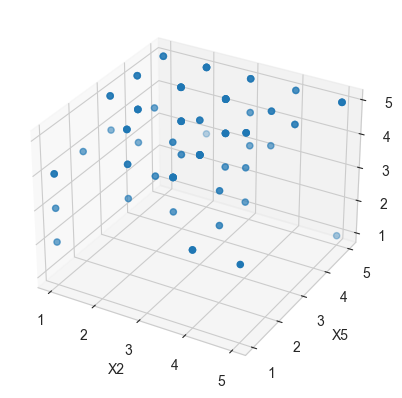

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X2'], data['X5'], data['X6'])
ax.set_xlabel('X2')
ax.set_ylabel('X5')
ax.set_zlabel('X6')

plt.show()

Logistic Regression


In [26]:
X = data.drop(['Y'], axis=1)

y = data['Y']


# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [27]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
from sklearn.metrics import accuracy_score
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5769
